# Machine Learning Projekt: Vorhersage von Gesundheitsausgaben

**Ziel:** Entwicklung eines Modells zur Vorhersage der jährlichen Gesundheitsausgaben von Versicherten basierend auf ihren demografischen und gesundheitlichen Merkmalen.

**Datensatz:** `insurance.csv`

## I. Umgebung und Setup

**Aufgabe 1: `scikit-learn` Installation prüfen/durchführen (Manuell im Terminal)**
* Terminal/Anaconda Prompt öffnen.
* Befehl ausführen: `conda install -c conda-forge scikit-learn` ODER `pip install scikit-learn`.
* *Dieser Schritt muss außerhalb dieses Notebooks in Ihrem Terminal durchgeführt werden.*

**Aufgabe 2: Notwendige Bibliotheken importieren**

In [23]:
# Standardbibliotheken für Datenmanipulation und numerische Operationen
import pandas as pd
import numpy as np

# Visualisierungsbibliotheken
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn Module (falls installiert)
# Modell-Auswahl
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score

# Lineare Modelle
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# Baum-basierte Modelle (Beispiel: RandomForest)
from sklearn.ensemble import RandomForestRegressor
# from sklearn.tree import DecisionTreeRegressor # Alternative

# Vorverarbeitung
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Metriken
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Statsmodels (für detaillierte statistische Analysen, insbesondere der linearen Regression)
import statsmodels.api as sm

# Einstellungen für Visualisierungen
%matplotlib inline
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("Bibliotheken erfolgreich importiert.")
# Überprüfen Sie die Scikit-learn Version, falls installiert
try:
    import sklearn
    print(f"Scikit-learn Version: {sklearn.__version__}")
except ImportError:
    print("Scikit-learn ist nicht installiert. Viele ML-Funktionen sind nicht verfügbar.")

Bibliotheken erfolgreich importiert.
Scikit-learn Version: 1.6.1


In [24]:
# Laden des Datensatzes
try:
    df = pd.read_csv('insurance.csv')
    print("Datensatz erfolgreich geladen.")
except FileNotFoundError:
    print("Fehler: 'insurance.csv' nicht im aktuellen Verzeichnis gefunden.")
    # Hier sollten Sie den korrekten Pfad zur Datei angeben, falls sie nicht im selben Ordner wie das Notebook liegt.
    # df = pd.read_csv('PFAD_ZU_IHRER_DATEI/insurance.csv')

Datensatz erfolgreich geladen.


**Aufgabe 4: Erste Datenübersicht**

In [25]:
if 'df' in locals():
    print("Erste 5 Zeilen des Datensatzes:")
    display(df.head())

    print("\nLetzte 5 Zeilen des Datensatzes:")
    display(df.tail())

    print("\nInformationen zum Datensatz (Datentypen, Non-Null-Werte):")
    df.info()

    print("\nDeskriptive Statistiken für alle Spalten:")
    display(df.describe(include='all'))
else:
    print("DataFrame 'df' wurde nicht geladen.")

Erste 5 Zeilen des Datensatzes:


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520



Letzte 5 Zeilen des Datensatzes:


,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603



Informationen zum Datensatz (Datentypen, Non-Null-Werte):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB

Deskriptive Statistiken für alle Spalten:


,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


**Aufgabe 5: Fehlende Werte identifizieren**

In [26]:
if 'df' in locals():
    print("Anzahl fehlender Werte pro Spalte:")
    missing_values = df.isnull().sum()
    print(missing_values)

    if missing_values.sum() == 0:
        print("\nKeine fehlenden Werte im Datensatz gefunden.")
    else:
        print("\nFehlende Werte gefunden. Bitte Strategie zur Behandlung festlegen.")
        # Beispiel: df.dropna(inplace=True) # Zeilen mit fehlenden Werten entfernen (mit Vorsicht verwenden)
        # Oder Imputation, z.B. für numerische Spalten: df['bmi'].fillna(df['bmi'].mean(), inplace=True)
else:
    print("DataFrame 'df' wurde nicht geladen.")

Anzahl fehlender Werte pro Spalte:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Keine fehlenden Werte im Datensatz gefunden.


**Aufgabe 6: Duplikate prüfen und behandeln**

In [27]:
if 'df' in locals():
    duplicate_count = df.duplicated().sum()
    print(f"Anzahl duplizierter Zeilen: {duplicate_count}")

    if duplicate_count > 0:
        # df.drop_duplicates(inplace=True)
        # print("Duplikate wurden entfernt.")
        print("Duplikate gefunden. Überlegen Sie, ob diese entfernt werden sollen (auskommentierter Code).")
    else:
        print("Keine Duplikate gefunden.")
else:
    print("DataFrame 'df' wurde nicht geladen.")

Anzahl duplizierter Zeilen: 1
Duplikate gefunden. Überlegen Sie, ob diese entfernt werden sollen (auskommentierter Code).


## III. Explorative Datenanalyse (EDA) & Visualisierung

In diesem Abschnitt untersuchen wir die Daten genauer, um Muster, Beziehungen und Anomalien zu entdecken.

**Aufgabe 7: Verteilung der Zielvariable (`charges`) analysieren**

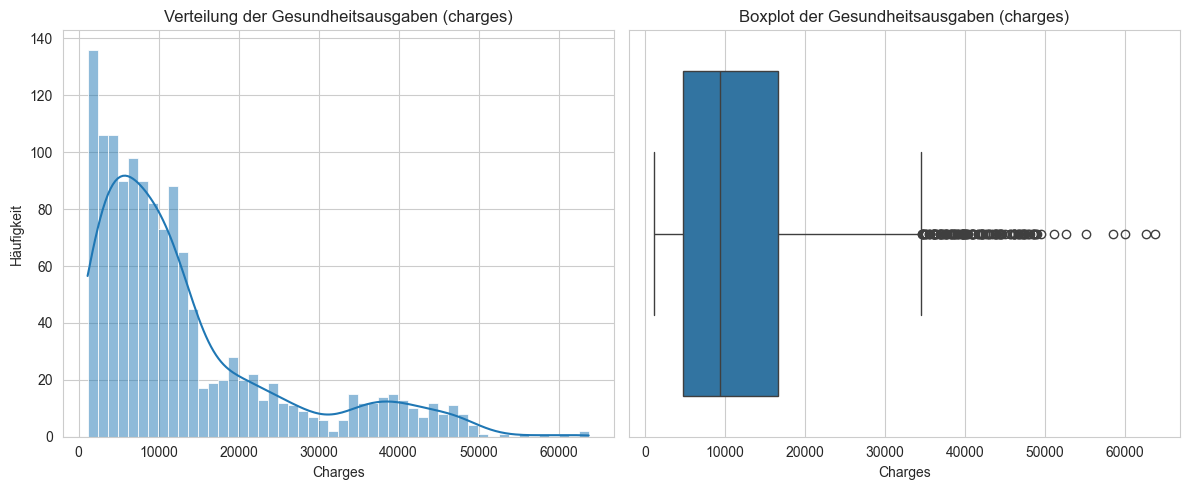

In [28]:
if 'df' in locals():
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(df['charges'], kde=True, bins=50)
    plt.title('Verteilung der Gesundheitsausgaben (charges)')
    plt.xlabel('Charges')
    plt.ylabel('Häufigkeit')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df['charges'])
    plt.title('Boxplot der Gesundheitsausgaben (charges)')
    plt.xlabel('Charges')

    plt.tight_layout()
    plt.show()

    # Kommentar zur Verteilung:
    # Die Verteilung von 'charges' ist typischerweise rechtsschief.
    # Eine Log-Transformation kann helfen, die Verteilung zu normalisieren,
    # was für einige lineare Modelle vorteilhaft sein kann.

    # Optionale Log-Transformation (ggf. später anwenden, wenn nötig)
    # df['log_charges'] = np.log1p(df['charges']) # log1p für Werte >= 0

    # plt.figure(figsize=(12, 5))
    # plt.subplot(1, 2, 1)
    # sns.histplot(df['log_charges'], kde=True, bins=50)
    # plt.title('Verteilung der log-transformierten Gesundheitsausgaben')
    # plt.subplot(1, 2, 2)
    # sns.boxplot(x=df['log_charges'])
    # plt.title('Boxplot der log-transformierten Gesundheitsausgaben')
    # plt.tight_layout()
    # plt.show()
else:
    print("DataFrame 'df' wurde nicht geladen.")

**Aufgabe 8: Numerische Merkmale analysieren (`age`, `bmi`, `children`)**

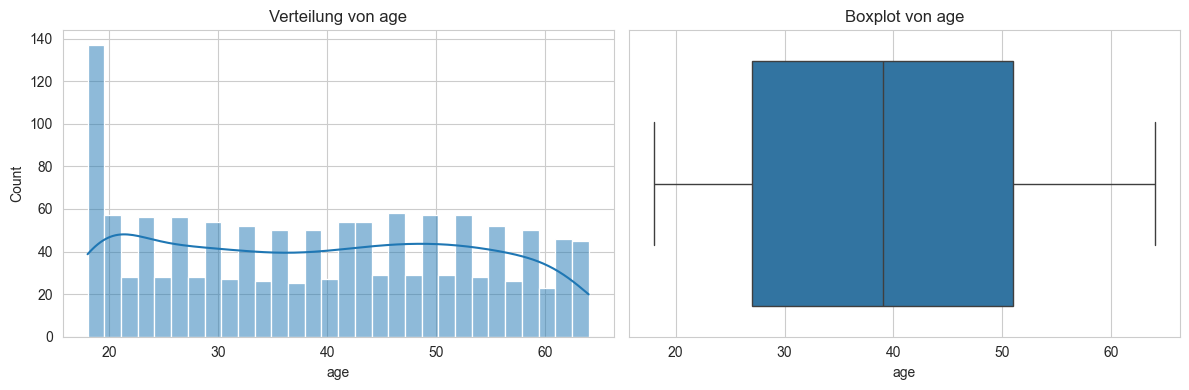

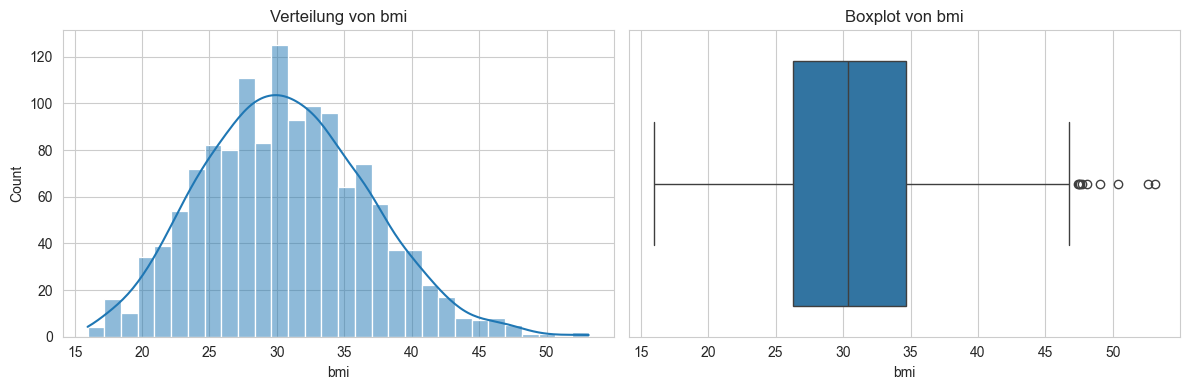

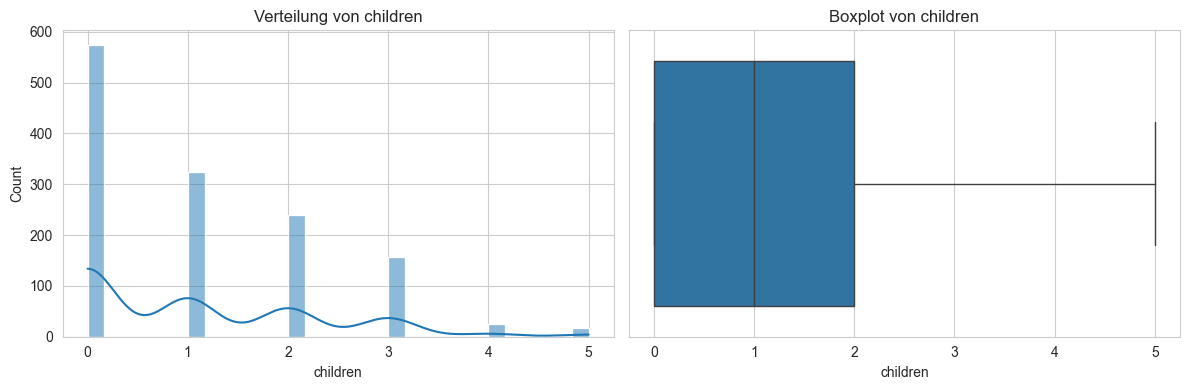

In [29]:
if 'df' in locals():
    numerical_features = ['age', 'bmi', 'children']
    for col in numerical_features:
        plt.figure(figsize=(12, 4))

        plt.subplot(1, 2, 1)
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(f'Verteilung von {col}')

        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot von {col}')

        plt.tight_layout()
        plt.show()
else:
    print("DataFrame 'df' wurde nicht geladen.")

**Aufgabe 9: Kategoriale Merkmale analysieren (`sex`, `smoker`, `region`)**

/var/folders/xj/z25gmv5d2w381ffb6gh0vy9m0000gp/T/ipykernel_10334/628448984.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


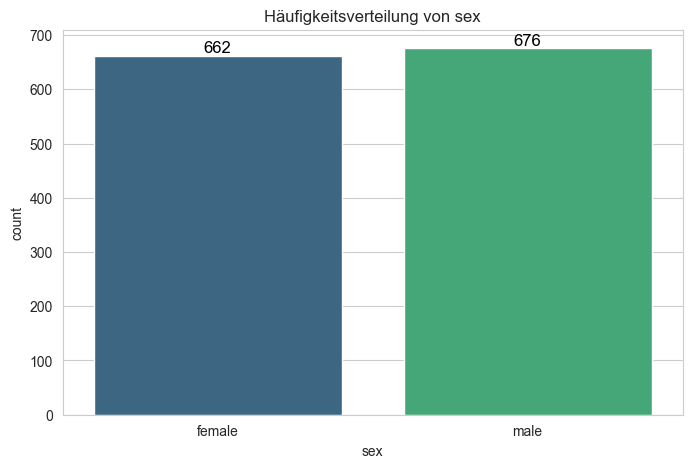


Werte für sex:
sex
male      50.523169
female    49.476831
Name: proportion, dtype: float64
------------------------------


/var/folders/xj/z25gmv5d2w381ffb6gh0vy9m0000gp/T/ipykernel_10334/628448984.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


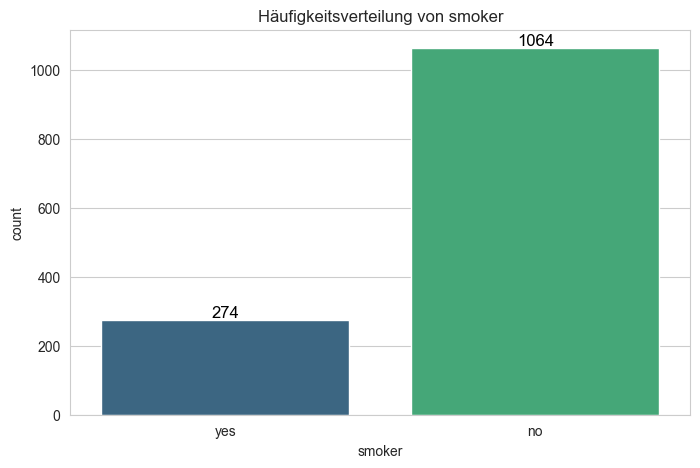


Werte für smoker:
smoker
no     79.521674
yes    20.478326
Name: proportion, dtype: float64
------------------------------


/var/folders/xj/z25gmv5d2w381ffb6gh0vy9m0000gp/T/ipykernel_10334/628448984.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


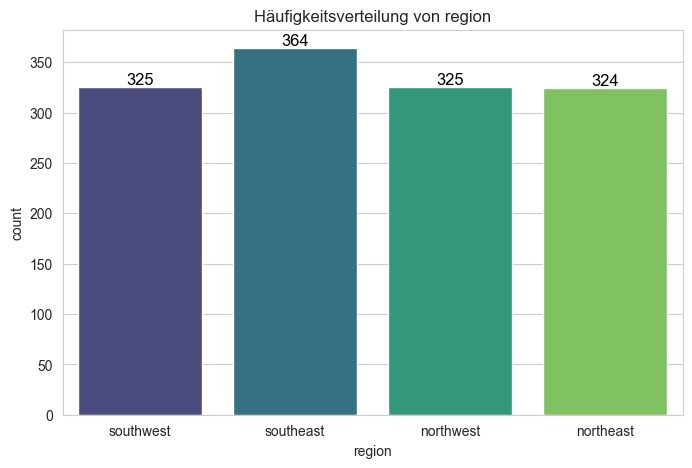


Werte für region:
region
southeast    27.204783
southwest    24.289985
northwest    24.289985
northeast    24.215247
Name: proportion, dtype: float64
------------------------------


In [30]:
if 'df' in locals():
    categorical_features = ['sex', 'smoker', 'region']
    for col in categorical_features:
        plt.figure(figsize=(8, 5))
        sns.countplot(x=col, data=df, palette='viridis')
        plt.title(f'Häufigkeitsverteilung von {col}')
        # Werte über den Balken anzeigen
        ax = plt.gca()
        for p in ax.patches:
            ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
                    fontsize=12, color='black', ha='center', va='bottom')
        plt.show()

        print(f"\nWerte für {col}:")
        print(df[col].value_counts(normalize=True) * 100) # Prozentuale Verteilung
        print("-" * 30)
else:
    print("DataFrame 'df' wurde nicht geladen.")

**Aufgabe 10: Beziehungen zur Zielvariable (`charges`) untersuchen**

Numerische Merkmale vs. Charges:


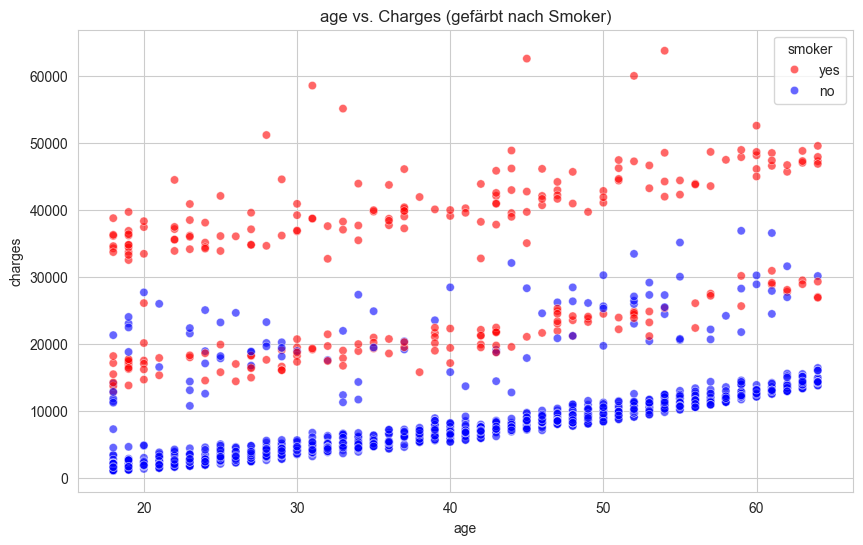

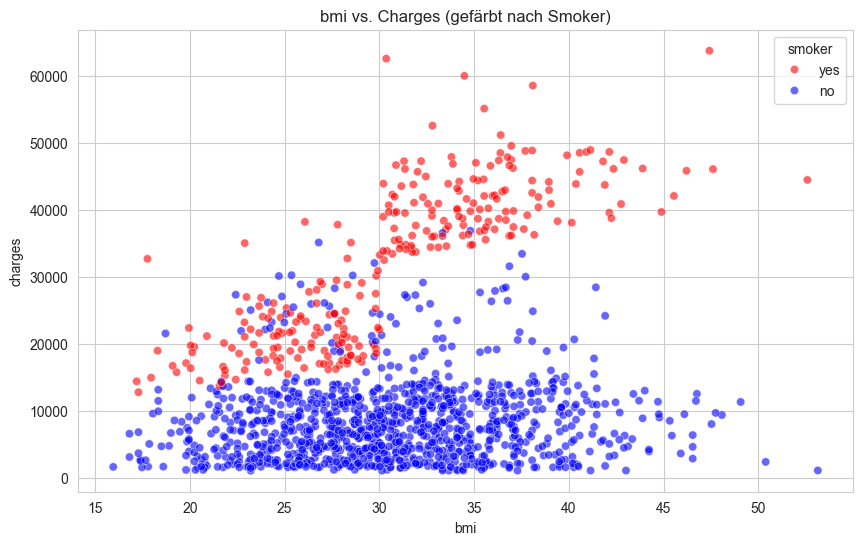

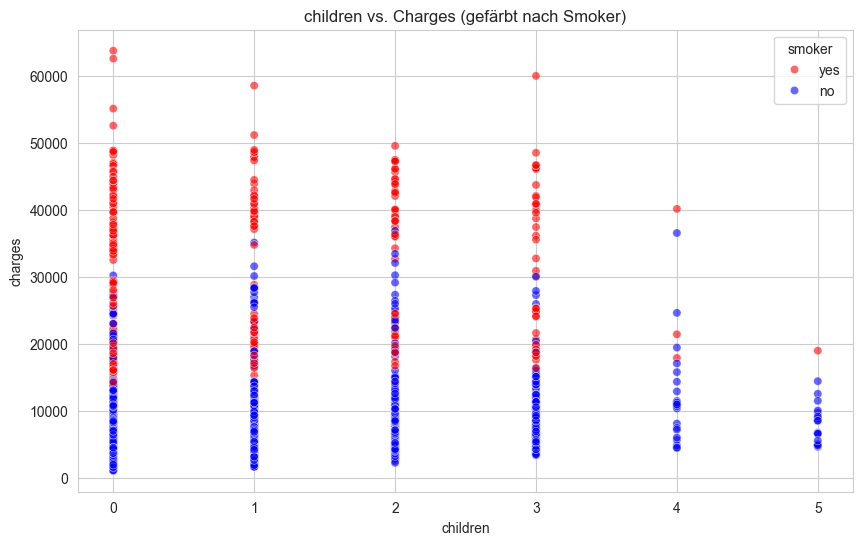


Kategoriale Merkmale vs. Charges:


/var/folders/xj/z25gmv5d2w381ffb6gh0vy9m0000gp/T/ipykernel_10334/3308533926.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], y=df['charges'], palette='pastel')


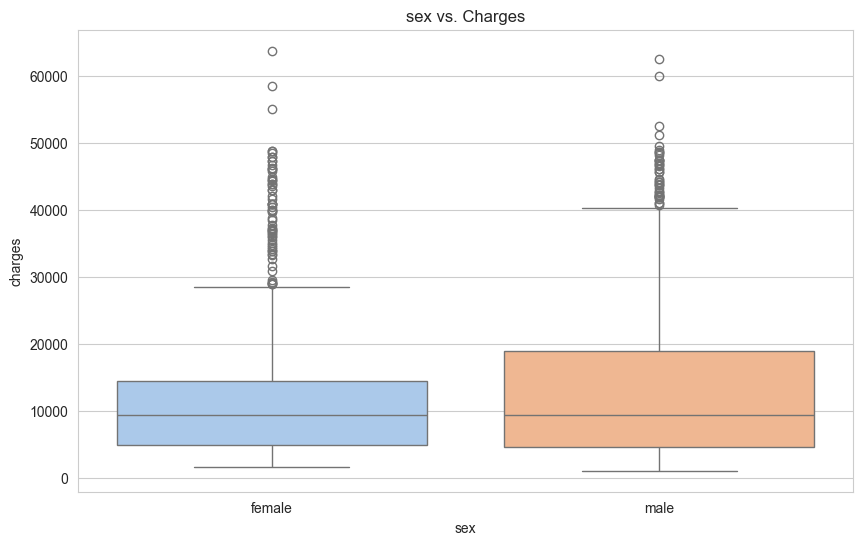

/var/folders/xj/z25gmv5d2w381ffb6gh0vy9m0000gp/T/ipykernel_10334/3308533926.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df[col], y=df['charges'], palette='pastel')


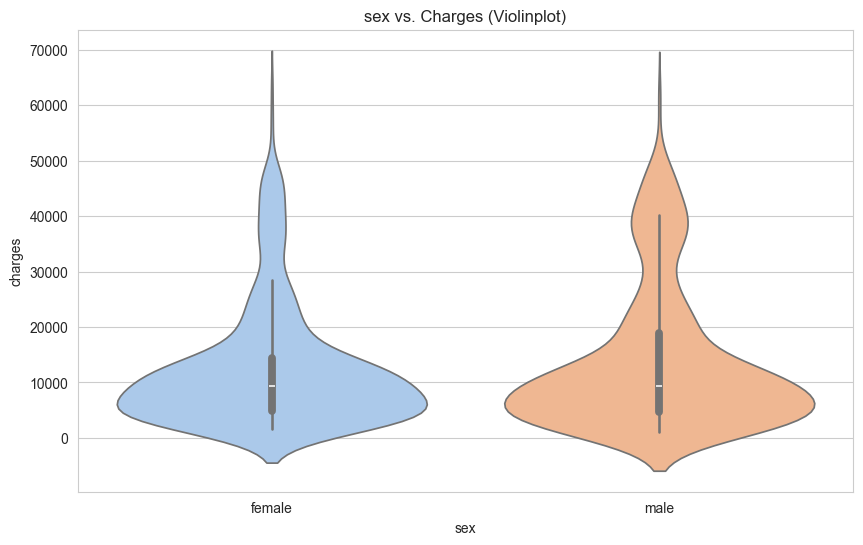

/var/folders/xj/z25gmv5d2w381ffb6gh0vy9m0000gp/T/ipykernel_10334/3308533926.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], y=df['charges'], palette='pastel')


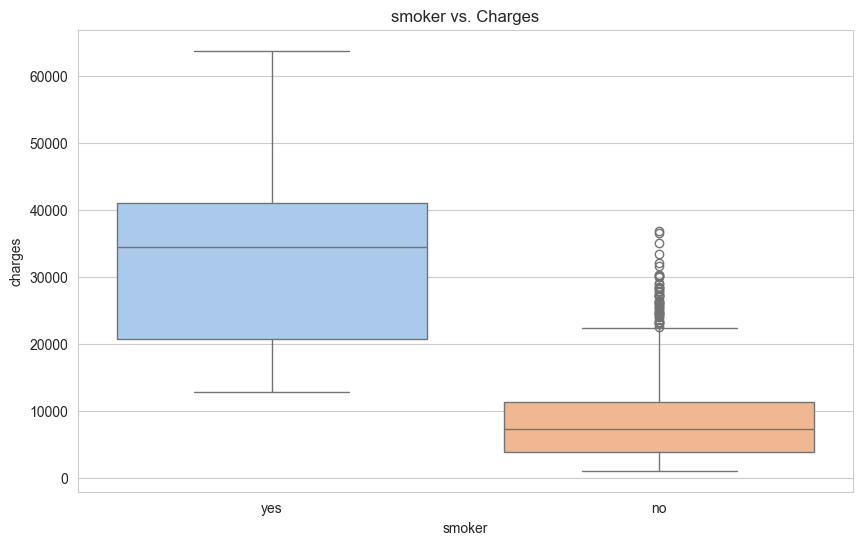

/var/folders/xj/z25gmv5d2w381ffb6gh0vy9m0000gp/T/ipykernel_10334/3308533926.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df[col], y=df['charges'], palette='pastel')


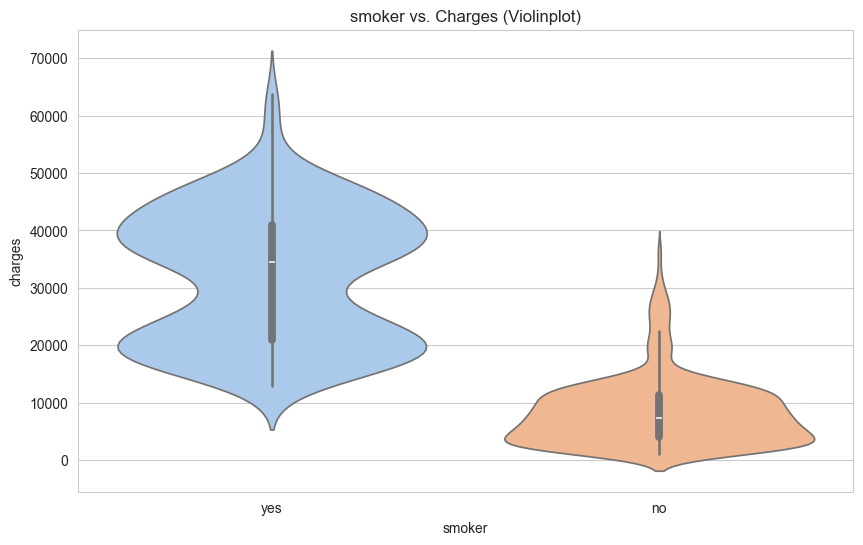

/var/folders/xj/z25gmv5d2w381ffb6gh0vy9m0000gp/T/ipykernel_10334/3308533926.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], y=df['charges'], palette='pastel')


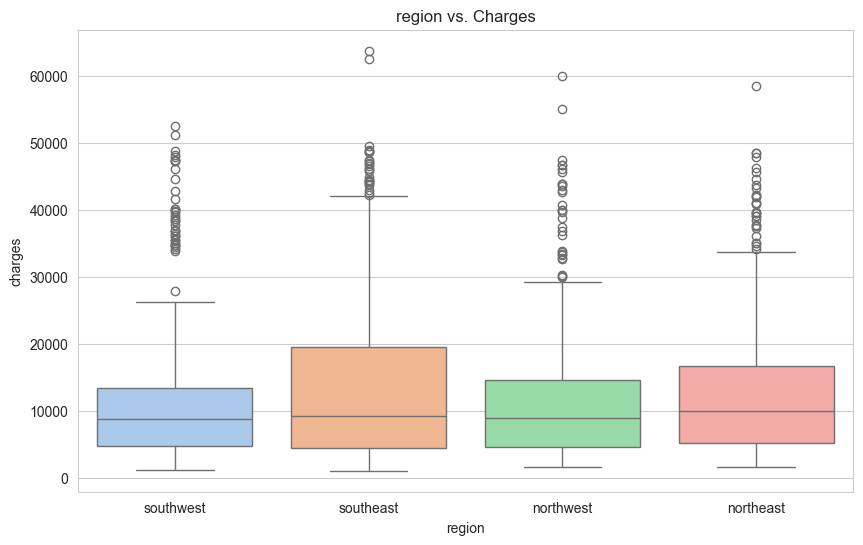

/var/folders/xj/z25gmv5d2w381ffb6gh0vy9m0000gp/T/ipykernel_10334/3308533926.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df[col], y=df['charges'], palette='pastel')


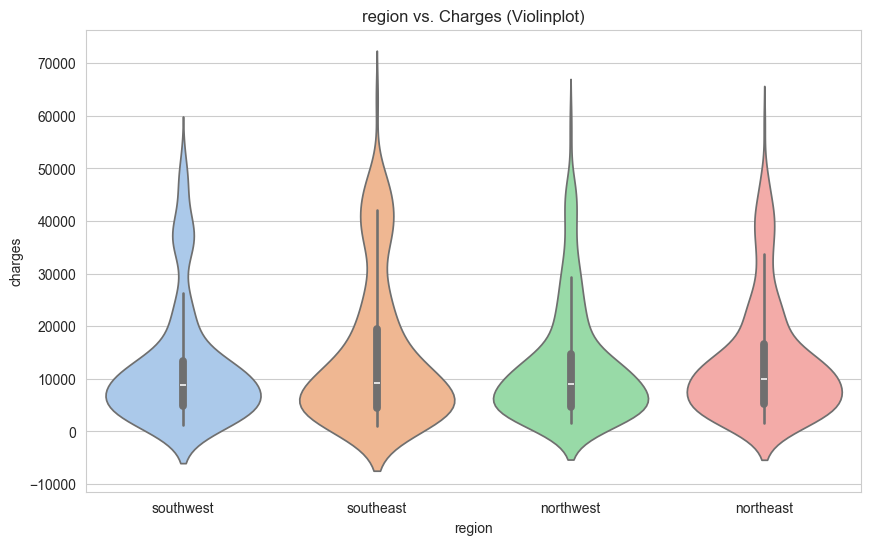

In [31]:
if 'df' in locals():
    # Numerische Merkmale vs. charges
    print("Numerische Merkmale vs. Charges:\n" + "="*30)
    for col in numerical_features: # ['age', 'bmi', 'children']
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=df[col], y=df['charges'], hue=df['smoker'], palette={'yes': 'red', 'no': 'blue'}, alpha=0.6)
        plt.title(f'{col} vs. Charges (gefärbt nach Smoker)')
        plt.show()

    # Kategoriale Merkmale vs. charges
    print("\nKategoriale Merkmale vs. Charges:\n" + "="*30)
    for col in categorical_features: # ['sex', 'smoker', 'region']
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=df[col], y=df['charges'], palette='pastel')
        plt.title(f'{col} vs. Charges')
        plt.show()

        plt.figure(figsize=(10, 6))
        sns.violinplot(x=df[col], y=df['charges'], palette='pastel')
        plt.title(f'{col} vs. Charges (Violinplot)')
        plt.show()
else:
    print("DataFrame 'df' wurde nicht geladen.")

**Aufgabe 11: Korrelationsanalyse**

Wir erstellen eine Korrelationsmatrix für die numerischen Merkmale, um lineare Beziehungen zwischen ihnen zu erkennen. Zuerst müssen wir kategoriale Merkmale, die binär sind (wie 'sex' und 'smoker'), in numerische Werte umwandeln, um sie in die Korrelationsmatrix einzubeziehen. 'region' wird später per One-Hot-Encoding umgewandelt und ist für eine direkte Korrelation hier weniger aussagekräftig.

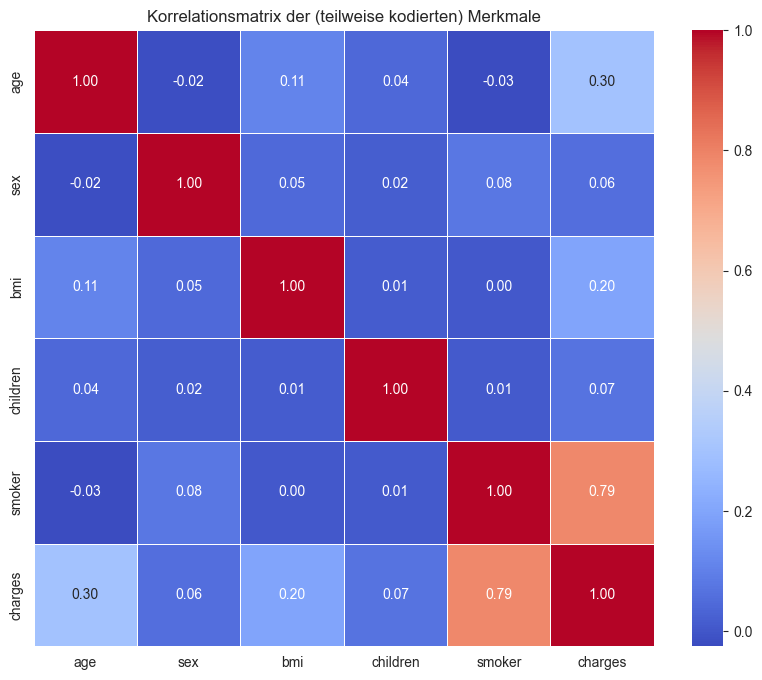

In [32]:
if 'df' in locals():
    # Kopie des DataFrames für diese Analyse erstellen, um Originaldaten nicht zu verändern
    df_corr = df.copy()

    # Kategoriale binäre Features in numerische Werte umwandeln
    # 'sex': female=0, male=1
    # 'smoker': no=0, yes=1
    if 'sex' in df_corr.columns:
        df_corr['sex'] = df_corr['sex'].map({'female': 0, 'male': 1})
    if 'smoker' in df_corr.columns:
        df_corr['smoker'] = df_corr['smoker'].map({'no': 0, 'yes': 1})

    # Numerische Spalten für die Korrelationsmatrix auswählen
    # (Wir lassen 'region' hier vorerst außen vor, da es mehrere Kategorien hat)
    numerical_cols_for_corr = ['age', 'sex', 'bmi', 'children', 'smoker', 'charges']
    
    # Sicherstellen, dass alle Spalten im DataFrame vorhanden sind
    existing_cols_for_corr = [col for col in numerical_cols_for_corr if col in df_corr.columns]
    
    if len(existing_cols_for_corr) > 1: # Korrelation benötigt mindestens 2 Spalten
        correlation_matrix = df_corr[existing_cols_for_corr].corr()

        plt.figure(figsize=(10, 8))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
        plt.title('Korrelationsmatrix der (teilweise kodierten) Merkmale')
        plt.show()
    else:
        print("Nicht genügend geeignete Spalten für die Korrelationsmatrix nach der Kodierung vorhanden.")

else:
    print("DataFrame 'df' wurde nicht geladen.")

**Aufgabe 12: EDA-Erkenntnisse dokumentieren**

* `charges` ist rechtsschief. Raucher (`smoker`=yes) haben tendenziell signifikant höhere Kosten.
* `age` zeigt eine positive Korrelation mit `charges`: Ältere Personen haben tendenziell höhere Kosten.
* `bmi` scheint ebenfalls eine positive Korrelation mit `charges` zu haben, insbesondere bei Rauchern.
* Die Anzahl der `children` hat einen geringeren, aber möglicherweise positiven Einfluss auf die Kosten.
* `sex` scheint einen geringeren direkten Einfluss auf die Kosten zu haben als andere Faktoren.
* `region` zeigt einige Unterschiede in den Mediankosten, aber die Überlappungen sind groß.
* Die stärkste Einzelkorrelation mit `charges` hat `smoker`.

*(Diese Erkenntnisse sollten Sie basierend auf den tatsächlich generierten Plots und Ihren Beobachtungen verfeinern.)*

## IV. Datenvorverarbeitung (Preprocessing)

Hier bereiten wir die Daten für das Modelltraining vor. Dazu gehören das Kodieren kategorialer Merkmale, das Aufteilen in Trainings- und Testsets und das Skalieren numerischer Merkmale.

**Aufgabe 13: Kategoriale Merkmale kodieren**

Wir verwenden One-Hot-Encoding für `region`, da es sich um ein nominales kategoriales Merkmal ohne inhärente Ordnung handelt. Für `sex` und `smoker` erstellen wir manuell binäre Spalten (0/1), da sie nur zwei Kategorien haben.

In [33]:
if 'df' in locals():
    # Erstelle eine Kopie des DataFrames für die Vorverarbeitung
    df_processed = df.copy()

    # Manuelles Kodieren für 'sex' und 'smoker'
    df_processed['sex'] = df_processed['sex'].map({'female': 0, 'male': 1})
    df_processed['smoker'] = df_processed['smoker'].map({'no': 0, 'yes': 1})

    # One-Hot-Encoding für 'region' mit pandas get_dummies
    # drop_first=True, um Multikollinearität zu vermeiden (eine Region wird zur Basislinie)
    df_processed = pd.get_dummies(df_processed, columns=['region'], drop_first=True, dtype=int)

    print("Kategoriale Merkmale erfolgreich kodiert.")
    display(df_processed.head())
else:
    print("DataFrame 'df' wurde nicht geladen.")

Kategoriale Merkmale erfolgreich kodiert.


,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


**Aufgabe 14: Merkmalsmatrix (X) und Zielvektor (y) definieren**

Die Zielvariable ist `charges`. Alle anderen (kodierten) Spalten sind unsere Merkmale (Features).
Optional: Wenn Sie sich für eine Log-Transformation von `charges` entschieden haben, verwenden Sie `np.log1p(df_processed['charges'])` als `y`.

In [34]:
if 'df_processed' in locals():
    X = df_processed.drop('charges', axis=1)
    y = df_processed['charges']
    # Falls Sie log-transformierte charges verwenden möchten:
    # y = np.log1p(df_processed['charges'])


    print("Merkmalsmatrix X (erste 5 Zeilen):")
    display(X.head())
    print("\nZielvektor y (erste 5 Werte):")
    display(y.head())

    print(f"\nForm von X: {X.shape}")
    print(f"Form von y: {y.shape}")
else:
    print("DataFrame 'df_processed' wurde nicht erstellt.")

Merkmalsmatrix X (erste 5 Zeilen):


,age,sex,bmi,children,smoker,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,0,0,1
1,18,1,33.770,1,0,0,1,0
2,28,1,33.000,3,0,0,1,0
3,33,1,22.705,0,0,1,0,0
4,32,1,28.880,0,0,1,0,0



Zielvektor y (erste 5 Werte):


0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64


Form von X: (1338, 8)
Form von y: (1338,)


**Aufgabe 15: Datensatz aufteilen**

Wir teilen die Daten in ein Trainingsset (zum Trainieren des Modells) und ein Testset (zur unabhängigen Bewertung des Modells) auf. Ein typisches Verhältnis ist 80% Training und 20% Test. `random_state` wird für Reproduzierbarkeit gesetzt.

In [35]:
if 'X' in locals() and 'y' in locals():
    try:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        print("Daten erfolgreich in Trainings- und Testsets aufgeteilt:")
        print(f"Form von X_train: {X_train.shape}")
        print(f"Form von X_test: {X_test.shape}")
        print(f"Form von y_train: {y_train.shape}")
        print(f"Form von y_test: {y_test.shape}")
    except NameError:
        print("Fehler: Scikit-learn (train_test_split) scheint nicht korrekt importiert worden zu sein oder ist nicht verfügbar.")
    except Exception as e:
        print(f"Ein Fehler ist aufgetreten: {e}")
else:
    print("Merkmalsmatrix X und/oder Zielvektor y wurden nicht definiert.")

Daten erfolgreich in Trainings- und Testsets aufgeteilt:
Form von X_train: (1070, 8)
Form von X_test: (268, 8)
Form von y_train: (1070,)
Form von y_test: (268,)


**Aufgabe 16: Feature Scaling (numerische Merkmale)**

Lineare Modelle (Lineare Regression, Ridge, Lasso) können von der Skalierung numerischer Merkmale profitieren. Baum-basierte Modelle sind davon in der Regel nicht betroffen. Wir verwenden hier den `StandardScaler`, der Merkmale so transformiert, dass sie einen Mittelwert von 0 und eine Standardabweichung von 1 haben.

Wichtig: Der Scaler wird **nur auf den Trainingsdaten angepasst (`fit`)** und dann verwendet, um **sowohl die Trainings- als auch die Testdaten zu transformieren (`transform`)**, um Datenlecks (Data Leakage) vom Testset in den Trainingsprozess zu vermeiden.

In [36]:
if 'X_train' in locals() and 'X_test' in locals():
    # Identifiziere die ursprünglichen numerischen Spalten, die skaliert werden sollen
    # Die One-Hot-kodierten Spalten sollten nicht skaliert werden.
    numerical_cols_to_scale = ['age', 'bmi', 'children'] # 'sex' und 'smoker' sind bereits 0/1

    # Erstelle Kopien, um die Original-DataFrames X_train und X_test nicht direkt zu verändern (optional, aber gute Praxis)
    X_train_scaled = X_train.copy()
    X_test_scaled = X_test.copy()

    try:
        scaler = StandardScaler()

        # Scaler auf den numerischen Spalten der Trainingsdaten anpassen und transformieren
        X_train_scaled[numerical_cols_to_scale] = scaler.fit_transform(X_train[numerical_cols_to_scale])

        # Die Testdaten mit dem angepassten Scaler transformieren
        X_test_scaled[numerical_cols_to_scale] = scaler.transform(X_test[numerical_cols_to_scale])

        print("Numerische Merkmale erfolgreich skaliert.")
        print("\nErste 5 Zeilen von X_train_scaled:")
        display(X_train_scaled.head())
        print("\nDeskriptive Statistiken der skalierten Trainingsdaten (numerische Spalten):")
        display(X_train_scaled[numerical_cols_to_scale].describe())

    except NameError:
        print("Fehler: Scikit-learn (StandardScaler) scheint nicht korrekt importiert worden zu sein oder ist nicht verfügbar.")
    except Exception as e:
        print(f"Ein Fehler beim Skalieren ist aufgetreten: {e}")
else:
    print("X_train und/oder X_test wurden nicht definiert.")

# Wichtig: Für das Modelltraining verwenden wir ab jetzt X_train_scaled und X_test_scaled (oder wie auch immer Sie sie benennen).
# y_train und y_test bleiben unverändert.

Numerische Merkmale erfolgreich skaliert.

Erste 5 Zeilen von X_train_scaled:


,age,sex,bmi,children,smoker,region_northwest,region_southeast,region_southwest
560,0.472227,0,-1.756525,0.734336,0,1,0,0
1285,0.543313,0,-1.033082,-0.911192,0,0,0,0
1142,0.898745,0,-0.943687,-0.911192,0,0,1,0
969,-0.025379,0,0.622393,3.202629,0,0,1,0
486,1.040918,0,-1.504893,1.557100,0,1,0,0



Deskriptive Statistiken der skalierten Trainingsdaten (numerische Spalten):


,age,bmi,children
count,1.070000e+03,1.070000e+03,1.070000e+03
mean,-1.992176e-16,-4.648410e-17,-2.324205e-17
std,1.000468e+00,1.000468e+00,1.000468e+00
min,-1.518194e+00,-2.417060e+00,-9.111921e-01
25%,-8.784157e-01,-7.210253e-01,-9.111921e-01
50%,1.016470e-02,-5.800739e-02,-8.842793e-02
75%,8.276587e-01,6.515707e-01,7.343363e-01
max,1.751782e+00,3.736342e+00,3.202629e+00


## V. Modelltraining und Hyperparameter-Optimierung

In diesem Abschnitt trainieren wir die geforderten Regressionsmodelle:
1.  Lineare Regression
2.  Ridge Regression (mit Hyperparameter-Tuning)
3.  Lasso Regression (mit Hyperparameter-Tuning)
4.  Eine entscheidungsbaum-basierte Methode (z.B. Random Forest Regressor, mit Hyperparameter-Tuning)

Wir verwenden Kreuzvalidierung während des Hyperparameter-Tunings, um robustere Ergebnisse zu erzielen.

**Allgemeine Vorbereitung: Kreuzvalidierungsstrategie definieren**

Wir definieren eine k-Fold Kreuzvalidierungsstrategie, die wir für GridSearchCV verwenden können.

In [37]:
if 'KFold' in globals(): # Prüft, ob KFold aus sklearn importiert wurde
    # Definieren der Kreuzvalidierungsstrategie
    # n_splits=5 bedeutet 5-fache Kreuzvalidierung
    # shuffle=True mischt die Daten vor dem Aufteilen
    # random_state für Reproduzierbarkeit der Folds
    cv_strategy = KFold(n_splits=5, shuffle=True, random_state=42)
    print("Kreuzvalidierungsstrategie (5-Fold) definiert.")
else:
    print("KFold nicht verfügbar. GridSearchCV wird Standard-CV verwenden oder fehlschlagen.")
    cv_strategy = None # Setze auf None, wenn nicht verfügbar

Kreuzvalidierungsstrategie (5-Fold) definiert.


**Aufgabe 17: Lineare Regression**

Wir beginnen mit einem einfachen linearen Regressionsmodell ohne Regularisierung.

In [38]:
# Dictionary zum Speichern der trainierten Modelle
models = {}
model_predictions = {} # Für spätere Evaluierung

if 'LinearRegression' in globals() and 'X_train_scaled' in locals() and 'y_train' in locals():
    try:
        print("Training: Lineare Regression")
        lin_reg = LinearRegression()
        lin_reg.fit(X_train_scaled, y_train)
        models['Linear Regression'] = lin_reg
        print("Lineare Regression erfolgreich trainiert.")

        # Optional: Koeffizienten anzeigen
        # print("Koeffizienten (Achsenabschnitt und Steigungen):")
        # print(f"Achsenabschnitt (Intercept): {lin_reg.intercept_}")
        # feature_names = X_train_scaled.columns
        # coefficients = pd.DataFrame(lin_reg.coef_, index=feature_names, columns=['Koeffizient'])
        # display(coefficients.sort_values(by='Koeffizient', ascending=False))

    except NameError:
        print("Fehler: LinearRegression, X_train_scaled oder y_train nicht verfügbar.")
    except Exception as e:
        print(f"Ein Fehler beim Training der Linearen Regression ist aufgetreten: {e}")
else:
    print("Voraussetzungen für Lineare Regression nicht erfüllt (Bibliothek oder Daten fehlen).")

# Alternative mit statsmodels für detailliertere Analyse (bereits in EDA/Preprocessing angedeutet)
# if 'sm' in globals() and 'X_train_scaled' in locals() and 'y_train' in locals():
#     X_train_const = sm.add_constant(X_train_scaled) # Konstante für den Achsenabschnitt hinzufügen
#     sm_lin_reg = sm.OLS(y_train, X_train_const).fit()
#     print("\nStatsmodels OLS Ergebnisse:")
#     print(sm_lin_reg.summary())
# else:
#     print("\nStatsmodels oder Daten für OLS-Analyse nicht verfügbar.")

Training: Lineare Regression
Lineare Regression erfolgreich trainiert.


**Aufgabe 18: Ridge Regression (mit Hyperparameter-Tuning)**

Ridge Regression fügt eine L2-Regularisierung hinzu, um Overfitting zu reduzieren und mit Multikollinearität umzugehen. Wir verwenden GridSearchCV, um den optimalen Regularisierungsparameter `alpha` zu finden.

In [39]:
if 'Ridge' in globals() and 'GridSearchCV' in globals() and 'X_train_scaled' in locals() and 'y_train' in locals() and cv_strategy is not None:
    try:
        print("\nTraining: Ridge Regression mit GridSearchCV")
        ridge_reg = Ridge()
        # Hyperparameter-Raster für Alpha
        # Werte können je nach Problem angepasst werden
        param_grid_ridge = {'alpha': [0.001, 0.01, 0.1, 1, 5, 10, 20, 50, 100]}

        # GridSearchCV initialisieren
        # scoring='neg_mean_squared_error' - GridSearchCV maximiert, daher negatives MSE
        # Alternativ: 'r2'
        grid_search_ridge = GridSearchCV(estimator=ridge_reg,
                                         param_grid=param_grid_ridge,
                                         scoring='neg_mean_squared_error',
                                         cv=cv_strategy,
                                         n_jobs=-1) # Nutzt alle verfügbaren CPU-Kerne

        grid_search_ridge.fit(X_train_scaled, y_train)

        best_ridge = grid_search_ridge.best_estimator_
        models['Ridge Regression'] = best_ridge

        print(f"Ridge Regression erfolgreich trainiert.")
        print(f"Bester Alpha-Wert für Ridge: {grid_search_ridge.best_params_['alpha']}")
        print(f"Bester neg_mean_squared_error Score (CV): {grid_search_ridge.best_score_}")

    except NameError:
        print("Fehler: Ridge, GridSearchCV, X_train_scaled, y_train oder cv_strategy nicht verfügbar.")
    except Exception as e:
        print(f"Ein Fehler beim Training der Ridge Regression ist aufgetreten: {e}")
else:
    print("\nVoraussetzungen für Ridge Regression mit GridSearchCV nicht erfüllt.")


Training: Ridge Regression mit GridSearchCV
Ridge Regression erfolgreich trainiert.
Bester Alpha-Wert für Ridge: 0.1
Bester neg_mean_squared_error Score (CV): -37736927.66099705


**Aufgabe 19: Lasso Regression (mit Hyperparameter-Tuning)**

Lasso Regression fügt eine L1-Regularisierung hinzu, die auch zur Feature Selection verwendet werden kann, da sie dazu neigt, unwichtige Koeffizienten auf Null zu setzen.

In [40]:
if 'Lasso' in globals() and 'GridSearchCV' in globals() and 'X_train_scaled' in locals() and 'y_train' in locals() and cv_strategy is not None:
    try:
        print("\nTraining: Lasso Regression mit GridSearchCV")
        lasso_reg = Lasso(max_iter=10000) # max_iter ggf. erhöhen, wenn Konvergenzprobleme auftreten
        # Hyperparameter-Raster für Alpha
        param_grid_lasso = {'alpha': [0.001, 0.01, 0.1, 0.5, 1, 5, 10]} # Alpha-Werte für Lasso sind oft kleiner

        grid_search_lasso = GridSearchCV(estimator=lasso_reg,
                                         param_grid=param_grid_lasso,
                                         scoring='neg_mean_squared_error',
                                         cv=cv_strategy,
                                         n_jobs=-1)

        grid_search_lasso.fit(X_train_scaled, y_train)

        best_lasso = grid_search_lasso.best_estimator_
        models['Lasso Regression'] = best_lasso

        print(f"Lasso Regression erfolgreich trainiert.")
        print(f"Bester Alpha-Wert für Lasso: {grid_search_lasso.best_params_['alpha']}")
        print(f"Bester neg_mean_squared_error Score (CV): {grid_search_lasso.best_score_}")

        # Koeffizienten des Lasso-Modells zur Bewertung der Feature Selection
        # if 'feature_names' in locals(): # Definiert in Zelle 35
        #    lasso_coeffs = pd.DataFrame(best_lasso.coef_, index=feature_names, columns=['Koeffizient_Lasso'])
        #    print("\nLasso Koeffizienten:")
        #    display(lasso_coeffs[lasso_coeffs['Koeffizient_Lasso'] != 0].sort_values(by='Koeffizient_Lasso', ascending=False))
        #    print(f"Anzahl der von Lasso auf Null gesetzten Features: {np.sum(best_lasso.coef_ == 0)}")
        # else:
        # print("Feature-Namen nicht definiert für Lasso-Koeffizienten-Anzeige.")


    except NameError:
        print("Fehler: Lasso, GridSearchCV, X_train_scaled, y_train oder cv_strategy nicht verfügbar.")
    except Exception as e:
        print(f"Ein Fehler beim Training der Lasso Regression ist aufgetreten: {e}")
else:
    print("\nVoraussetzungen für Lasso Regression mit GridSearchCV nicht erfüllt.")


Training: Lasso Regression mit GridSearchCV
Lasso Regression erfolgreich trainiert.
Bester Alpha-Wert für Lasso: 10
Bester neg_mean_squared_error Score (CV): -37726672.22609968


**Aufgabe 20: Entscheidungsbaum-basierte Methode (z.B. Random Forest Regressor mit Hyperparameter-Tuning)**

Random Forests sind ein Ensemble von Entscheidungsbäumen und oft robuster und genauer als einzelne Bäume.

In [41]:
if 'RandomForestRegressor' in globals() and 'GridSearchCV' in globals() and 'X_train_scaled' in locals() and 'y_train' in locals() and cv_strategy is not None:
    try:
        print("\nTraining: Random Forest Regressor mit GridSearchCV")
        rf_reg = RandomForestRegressor(random_state=42)

        # Hyperparameter-Raster (Beispiel, kann erweitert/angepasst werden)
        # Ein zu großes Raster kann sehr lange dauern!
        param_grid_rf = {
            'n_estimators': [100, 150],       # Anzahl der Bäume
            'max_depth': [10, 20, None],      # Maximale Tiefe der Bäume
            'min_samples_split': [2, 5],    # Minimale Anzahl Samples für einen Split
            'min_samples_leaf': [1, 2]      # Minimale Anzahl Samples in einem Blatt
        }
        # Für eine schnellere erste Iteration kann ein kleineres Raster verwendet werden:
        # param_grid_rf = {'n_estimators': [100], 'max_depth': [10]}


        grid_search_rf = GridSearchCV(estimator=rf_reg,
                                      param_grid=param_grid_rf,
                                      scoring='neg_mean_squared_error',
                                      cv=cv_strategy,
                                      n_jobs=-1,
                                      verbose=1) # Zeigt Fortschritt an

        grid_search_rf.fit(X_train_scaled, y_train)

        best_rf = grid_search_rf.best_estimator_
        models['Random Forest Regressor'] = best_rf

        print(f"Random Forest Regressor erfolgreich trainiert.")
        print(f"Beste Hyperparameter für Random Forest: {grid_search_rf.best_params_}")
        print(f"Bester neg_mean_squared_error Score (CV): {grid_search_rf.best_score_}")

        # Merkmalswichtigkeiten
        # if 'feature_names' in locals():
        #    importances = pd.DataFrame(best_rf.feature_importances_, index=feature_names, columns=['Wichtigkeit'])
        #    print("\nRandom Forest Merkmalswichtigkeiten:")
        #    display(importances.sort_values(by='Wichtigkeit', ascending=False))
        # else:
        # print("Feature-Namen nicht definiert für RF-Wichtigkeiten-Anzeige.")


    except NameError:
        print("Fehler: RandomForestRegressor, GridSearchCV, X_train_scaled, y_train oder cv_strategy nicht verfügbar.")
    except Exception as e:
        print(f"Ein Fehler beim Training des Random Forest Regressors ist aufgetreten: {e}")
else:
    print("\nVoraussetzungen für Random Forest Regressor mit GridSearchCV nicht erfüllt.")

print("\nAlle Modelle im Dictionary 'models':")
print(models.keys())


Training: Random Forest Regressor mit GridSearchCV
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Random Forest Regressor erfolgreich trainiert.
Beste Hyperparameter für Random Forest: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Bester neg_mean_squared_error Score (CV): -22927188.852810033

Alle Modelle im Dictionary 'models':
dict_keys(['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Random Forest Regressor'])


## VI. Modellevaluierung

Nachdem die Modelle trainiert wurden, bewerten wir nun ihre Leistung auf dem Testset (`X_test_scaled`, `y_test`). Wir berechnen verschiedene Metriken und vergleichen die Modelle.

**Aufgabe 21: Vorhersagen auf dem Testset generieren**

In [42]:
# Dictionary zum Speichern der Metriken für jedes Modell
model_metrics = {}

if 'models' in locals() and 'X_test_scaled' in locals() and 'y_test' in locals() and len(models) > 0:
    print("Generiere Vorhersagen für die trainierten Modelle auf dem Testset...")
    for model_name, model in models.items():
        try:
            y_pred = model.predict(X_test_scaled)
            model_predictions[model_name] = y_pred
            print(f"Vorhersagen für '{model_name}' erfolgreich generiert.")
        except Exception as e:
            print(f"Fehler bei der Vorhersage mit '{model_name}': {e}")
            model_predictions[model_name] = None # Keine Vorhersage möglich
else:
    print("Voraussetzungen für Vorhersagen nicht erfüllt (Modelle, X_test_scaled oder y_test fehlen oder 'models' ist leer).")

print("\nGespeicherte Vorhersagen für Modelle:", list(model_predictions.keys()))

Generiere Vorhersagen für die trainierten Modelle auf dem Testset...
Vorhersagen für 'Linear Regression' erfolgreich generiert.
Vorhersagen für 'Ridge Regression' erfolgreich generiert.
Vorhersagen für 'Lasso Regression' erfolgreich generiert.
Vorhersagen für 'Random Forest Regressor' erfolgreich generiert.

Gespeicherte Vorhersagen für Modelle: ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Random Forest Regressor']


**Aufgabe 22: Metriken berechnen und vergleichen**

Wir berechnen MAE, MSE, RMSE und R² für jedes Modell.

**Wichtiger Hinweis zur Log-Transformation:**
Wenn Sie die Zielvariable `y` (also `charges`) log-transformiert haben (z.B. mit `np.log1p()`), dann sind auch `y_test` und die Vorhersagen `y_pred` auf dieser logarithmischen Skala. Für eine interpretierbare Bewertung der Fehler in der ursprünglichen Geldeinheit (z.B. Dollar), müssen Sie `y_test` und `y_pred` **vor** der Berechnung von MAE, MSE, RMSE zurücktransformieren (z.B. mit `np.expm1()`). R² kann direkt auf der transformierten Skala berechnet und interpretiert werden, da es ein relatives Maß ist.

Im folgenden Code gehen wir davon aus, dass **KEINE** Log-Transformation von `y` durchgeführt wurde. Wenn doch, müssen Sie die entsprechenden Zeilen für die Rücktransformation einkommentieren und anpassen.

In [43]:
if 'model_predictions' in locals() and 'y_test' in locals() and len(model_predictions) > 0:
    results_list = []

    for model_name, y_pred in model_predictions.items():
        if y_pred is not None:
            # --- ANPASSUNG BEI LOG-TRANSFORMATION ---
            # Wenn y log-transformiert wurde, hier y_test und y_pred zurücktransformieren:
            # y_test_orig = np.expm1(y_test) # Beispiel für Rücktransformation von log1p
            # y_pred_orig = np.expm1(y_pred)
            # --- ENDE ANPASSUNG ---

            # Wenn KEINE Log-Transformation, dann:
            y_test_eval = y_test
            y_pred_eval = y_pred
            # Wenn Log-Transformation, dann für MAE, MSE, RMSE die _orig Versionen verwenden:
            # y_test_eval = y_test_orig
            # y_pred_eval = y_pred_orig


            try:
                mae = mean_absolute_error(y_test_eval, y_pred_eval)
                mse = mean_squared_error(y_test_eval, y_pred_eval)
                rmse = np.sqrt(mse)
                r2 = r2_score(y_test_eval, y_pred_eval) # R2 kann auch auf transformierter Skala berechnet werden

                model_metrics[model_name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}
                results_list.append({'Modell': model_name, 'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2})
                print(f"\nMetriken für '{model_name}':")
                print(f"  MAE:  {mae:.2f}")
                print(f"  MSE:  {mse:.2f}")
                print(f"  RMSE: {rmse:.2f}")
                print(f"  R²:   {r2:.4f}")

            except NameError:
                print(f"Fehler bei Metrikberechnung für '{model_name}': Scikit-learn Metriken nicht verfügbar.")
                break # Schleife abbrechen, wenn Metriken fehlen
            except Exception as e:
                print(f"Fehler bei Metrikberechnung für '{model_name}': {e}")
        else:
            print(f"Keine Vorhersagen für '{model_name}' vorhanden, Metriken können nicht berechnet werden.")

    # Ergebnisse als DataFrame darstellen
    if results_list:
        results_df = pd.DataFrame(results_list)
        results_df = results_df.sort_values(by='RMSE', ascending=True) # Sortieren nach RMSE (niedriger ist besser)
        print("\n--- Zusammenfassung der Modell-Performance (Testset) ---")
        display(results_df.set_index('Modell'))
else:
    print("Voraussetzungen für Metrikberechnung nicht erfüllt.")


Metriken für 'Linear Regression':
  MAE:  4181.19
  MSE:  33596915.85
  RMSE: 5796.28
  R²:   0.7836

Metriken für 'Ridge Regression':
  MAE:  4182.39
  MSE:  33601518.32
  RMSE: 5796.68
  R²:   0.7836

Metriken für 'Lasso Regression':
  MAE:  4190.75
  MSE:  33682158.86
  RMSE: 5803.63
  R²:   0.7830

Metriken für 'Random Forest Regressor':
  MAE:  2459.18
  MSE:  19446817.70
  RMSE: 4409.85
  R²:   0.8747

--- Zusammenfassung der Modell-Performance (Testset) ---


,MAE,MSE,RMSE,R2
Modell,,,,
Random Forest Regressor,2459.179766,1.944682e+07,4409.854613,0.874738
Linear Regression,4181.194474,3.359692e+07,5796.284659,0.783593
Ridge Regression,4182.386167,3.360152e+07,5796.681664,0.783563
Lasso Regression,4190.753979,3.368216e+07,5803.633247,0.783044


**Aufgabe 23: Residuenanalyse (optional, aber empfohlen, besonders für lineare Modelle)**

Residuen sind die Differenz zwischen den tatsächlichen und den vorhergesagten Werten. Eine gute Passform des Modells zeigt sich oft darin, dass die Residuen zufällig um Null verteilt sind und keine klaren Muster aufweisen.

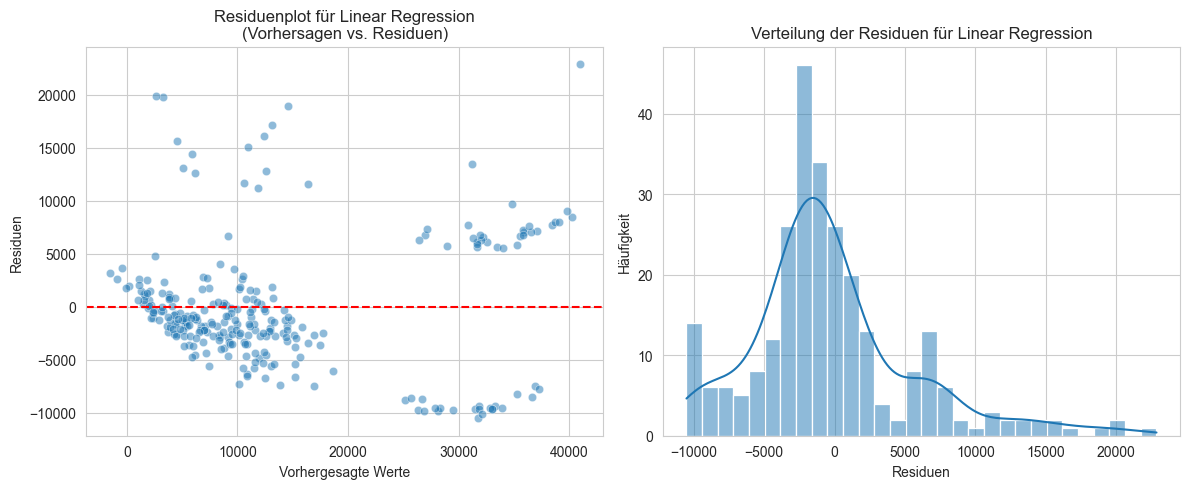

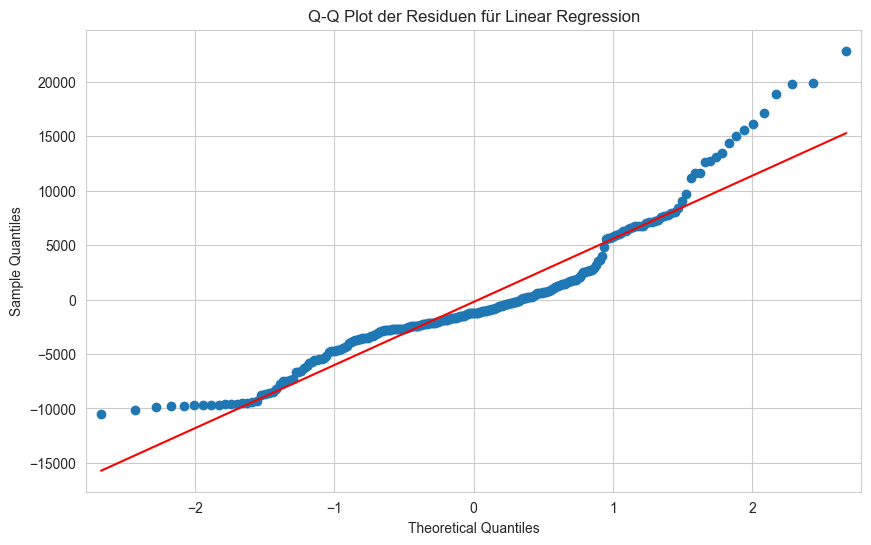

In [44]:
# Beispiel Residuenanalyse für das beste lineare Modell oder alle Modelle
# Wir wählen hier als Beispiel das 'Linear Regression'-Modell, wenn vorhanden.
# Passen Sie 'selected_model_for_residuals' an, wenn Sie ein anderes Modell analysieren möchten.

selected_model_name_for_residuals = 'Linear Regression' # oder 'Ridge Regression', 'Lasso Regression' etc.

if selected_model_name_for_residuals in model_predictions and model_predictions[selected_model_name_for_residuals] is not None:
    y_pred_residuals = model_predictions[selected_model_name_for_residuals]
    residuals = y_test - y_pred_residuals # Verwenden Sie y_test und y_pred auf der Skala, auf der das Modell trainiert wurde

    plt.figure(figsize=(12, 5))

    # Scatter-Plot: Vorhersagen vs. Residuen
    plt.subplot(1, 2, 1)
    sns.scatterplot(x=y_pred_residuals, y=residuals, alpha=0.5)
    plt.axhline(0, color='red', linestyle='--')
    plt.title(f'Residuenplot für {selected_model_name_for_residuals}\n(Vorhersagen vs. Residuen)')
    plt.xlabel('Vorhergesagte Werte')
    plt.ylabel('Residuen')

    # Histogramm der Residuen
    plt.subplot(1, 2, 2)
    sns.histplot(residuals, kde=True, bins=30)
    plt.title(f'Verteilung der Residuen für {selected_model_name_for_residuals}')
    plt.xlabel('Residuen')
    plt.ylabel('Häufigkeit')

    plt.tight_layout()
    plt.show()

    # Überprüfung der Normalverteilung der Residuen mit einem Q-Q-Plot (optional)
    if 'sm' in globals():
        fig = sm.qqplot(residuals, line='s') # 's' für standardisierte Linie
        plt.title(f'Q-Q Plot der Residuen für {selected_model_name_for_residuals}')
        plt.show()
    else:
        print("Statsmodels nicht importiert, Q-Q Plot wird übersprungen.")

else:
    print(f"Keine Vorhersagen für '{selected_model_name_for_residuals}' vorhanden für Residuenanalyse oder Modell nicht trainiert.")